#  Imports and Config 

In [62]:

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



# Load Data 

In [63]:
df = pd.read_csv("Final_Combined_data.csv")
df.head()

,Title,Short_Title,Location,Java,Min Experience,Max Experience,Min Salary,Max Salary,Spring Boot,SQL,...,spark,Cloud_Computing,manual_testing,regression_testing,automation_testing,software_testing,Kubernetes,Docker,Jenkins,CI/CD
0,Test Engineer - Selenium with Java Job,Java,Pune,1,1.0,2.0,NaN,NaN,0,0,...,0,0,0,0,0,1,0,0,0,1
1,Java Full Stack Developer,Java,Pune,1,0.0,0.0,4.0,4.0,1,1,...,0,0,0,0,0,0,0,0,1,0
2,"Full Stack Developer (Java, React, Angular)",Java,Pune,1,0.0,9.0,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fullstack Engineer II,Java,Pune,0,1.0,4.0,NaN,NaN,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Java Microservices Developer,Java,Pune,1,5.0,10.0,NaN,NaN,1,0,...,0,0,0,0,0,0,0,0,0,0


# EDA

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23307 entries, 0 to 23306
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               23307 non-null  object 
 1   Short_Title         23307 non-null  object 
 2   Location            14391 non-null  object 
 3   Java                23307 non-null  int64  
 4   Min Experience      22999 non-null  float64
 5   Max Experience      22999 non-null  float64
 6   Min Salary          1755 non-null   float64
 7   Max Salary          1755 non-null   float64
 8   Spring Boot         23307 non-null  int64  
 9   SQL                 23307 non-null  int64  
 10  Git                 23307 non-null  int64  
 11  Microservices       23307 non-null  int64  
 12  Hibernate           23307 non-null  int64  
 13  Power_BI            23307 non-null  int64  
 14  Excel               23307 non-null  int64  
 15  Python              23307 non-null  int64  
 16  Visu

In [65]:
df.describe()

,Java,Min Experience,Max Experience,Min Salary,Max Salary,Spring Boot,SQL,Git,Microservices,Hibernate,...,spark,Cloud_Computing,manual_testing,regression_testing,automation_testing,software_testing,Kubernetes,Docker,Jenkins,CI/CD
count,23307.000000,22999.000000,22999.000000,1755.000000,1755.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,...,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000
mean,0.291629,3.835428,7.358842,10.414536,16.736524,0.064830,0.075256,0.073969,0.041575,0.039516,...,0.021367,0.086240,0.041232,0.021710,0.165873,0.458060,0.031450,0.020166,0.013472,0.374480
std,0.454522,2.897892,3.710157,9.249463,13.362302,0.246231,0.263810,0.261726,0.199621,0.194823,...,0.144607,0.280724,0.198831,0.145739,0.371974,0.498249,0.174534,0.140570,0.115288,0.483999
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,5.000000,3.500000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,7.000000,8.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,5.000000,10.000000,15.000000,24.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,24.000000,31.000000,75.000000,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
df.isna().sum()

Title                     0
Short_Title               0
Location               8916
Java                      0
Min Experience          308
Max Experience          308
Min Salary            21552
Max Salary            21552
Spring Boot               0
SQL                       0
Git                       0
Microservices             0
Hibernate                 0
Power_BI                  0
Excel                     0
Python                    0
Visualization             0
spark                     0
Cloud_Computing           0
manual_testing            0
regression_testing        0
automation_testing        0
software_testing          0
Kubernetes                0
Docker                    0
Jenkins                   0
CI/CD                     0
dtype: int64

<AxesSubplot:>

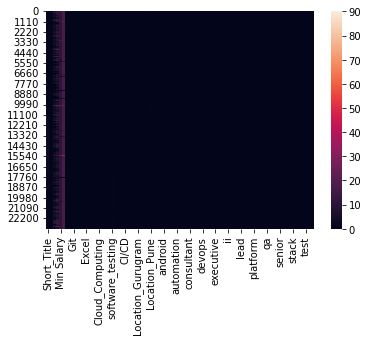

In [78]:
sns.heatmap(df)

# Preprocessing 

In [67]:
df['Min Experience'].fillna(df['Min Experience'].mean(), inplace=True)
df['Max Experience'].fillna(df['Max Experience'].mean(), inplace=True)
df['Min Salary'].fillna(df['Min Salary'].mean(), inplace=True)
df['Max Salary'].fillna(df['Max Salary'].mean(), inplace=True)
df['Location'].fillna('Bangalore', inplace=True)

In [68]:
label_encoder = LabelEncoder()
df['Short_Title'] = label_encoder.fit_transform(df['Short_Title'])


In [69]:
df = pd.get_dummies(df, columns=['Location'], drop_first=True)

In [70]:
df

,Title,Short_Title,Java,Min Experience,Max Experience,Min Salary,Max Salary,Spring Boot,SQL,Git,...,Jenkins,CI/CD,Location_Banglore,Location_Chennai,Location_Delhi,Location_Gurugram,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Location_Pune
0,Test Engineer - Selenium with Java Job,1,1,1.0,2.0,10.414536,16.736524,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,Java Full Stack Developer,1,1,0.0,0.0,4.000000,4.000000,1,1,0,...,1,0,0,0,0,0,0,0,0,1
2,"Full Stack Developer (Java, React, Angular)",1,1,0.0,9.0,10.414536,16.736524,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Fullstack Engineer II,1,0,1.0,4.0,10.414536,16.736524,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Java Microservices Developer,1,1,5.0,10.0,10.414536,16.736524,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23302,Specialist Software Engineer,2,0,2.0,4.0,10.414536,16.736524,0,0,0,...,0,1,0,0,0,0,1,0,0,0
23303,Lead I - Software Engineering (Reactjs),2,0,5.0,10.0,10.414536,16.736524,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23304,Software Engineer,2,1,7.0,10.0,10.414536,16.736524,1,0,0,...,0,0,0,0,0,0,0,0,0,0
23305,Lead I - Software Engineering - SPM,2,0,6.0,10.0,10.414536,16.736524,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [72]:
# TF-IDF on Job_Title
tfidf = TfidfVectorizer(max_features=50)
tfidf_matrix = tfidf.fit_transform(df['Title'].fillna("")).toarray()
tfidf_df = pd.DataFrame(tfidf_matrix, columns=tfidf.get_feature_names_out())
df = pd.concat([df.drop(['Title'], axis=1), tfidf_df], axis=1)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23307 entries, 0 to 23306
Data columns (total 83 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Short_Title         23307 non-null  int32  
 1   Java                23307 non-null  int64  
 2   Min Experience      23307 non-null  float64
 3   Max Experience      23307 non-null  float64
 4   Min Salary          23307 non-null  float64
 5   Max Salary          23307 non-null  float64
 6   Spring Boot         23307 non-null  int64  
 7   SQL                 23307 non-null  int64  
 8   Git                 23307 non-null  int64  
 9   Microservices       23307 non-null  int64  
 10  Hibernate           23307 non-null  int64  
 11  Power_BI            23307 non-null  int64  
 12  Excel               23307 non-null  int64  
 13  Python              23307 non-null  int64  
 14  Visualization       23307 non-null  int64  
 15  spark               23307 non-null  int64  
 16  Clou

In [74]:
X.columns

Index(['Java', 'Min Experience', 'Max Experience', 'Min Salary', 'Max Salary',
       'Spring Boot', 'SQL', 'Git', 'Microservices', 'Hibernate', 'Power_BI',
       'Excel', 'Python', 'Visualization', 'spark', 'Cloud_Computing',
       'manual_testing', 'regression_testing', 'automation_testing',
       'software_testing', 'Kubernetes', 'Docker', 'Jenkins', 'CI/CD',
       'Location_Banglore', 'Location_Chennai', 'Location_Delhi',
       'Location_Gurugram', 'Location_Hyderabad', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'ai', 'analyst', 'android',
       'application', 'architect', 'associate', 'automation', 'backend',
       'business', 'cloud', 'consultant', 'data', 'developer', 'development',
       'devops', 'dot', 'engineer', 'engineering', 'executive', 'fullstack',
       'intern', 'java', 'lead', 'manager', 'manual', 'net', 'platform',
       'principal', 'product', 'python', 'quality', 'react', 'scientist',
       'senior', 'software', 'specialist', 'sr', '

In [75]:
df.corr()

,Short_Title,Java,Min Experience,Max Experience,Min Salary,Max Salary,Spring Boot,SQL,Git,Microservices,...,software,specialist,sr,stack,staff,support,technical,test,tester,testing
Short_Title,1.000000,0.117801,-0.010334,-0.006418,0.018769,0.016377,0.005900,0.028229,0.058854,0.004269,...,0.278954,-0.080655,0.031650,0.054355,0.015147,-0.058253,-0.047927,0.288625,0.225853,0.130019
Java,0.117801,1.000000,0.110474,0.101436,0.063127,0.068009,0.345179,0.020927,0.035791,0.223404,...,0.084696,-0.015340,0.004446,0.146239,0.010859,-0.002512,0.043998,-0.055540,-0.038730,-0.032761
Min Experience,-0.010334,0.110474,1.000000,0.915068,0.184809,0.186962,0.105612,-0.013080,0.000555,0.106574,...,-0.009684,0.029070,0.048736,0.023106,0.075095,-0.013460,0.076537,-0.032773,-0.061543,-0.036655
Max Experience,-0.006418,0.101436,0.915068,1.000000,0.191140,0.200537,0.100949,-0.014080,-0.003707,0.103915,...,-0.001485,0.021092,0.050164,0.020981,0.074391,-0.008955,0.073555,-0.040401,-0.056028,-0.036636
Min Salary,0.018769,0.063127,0.184809,0.191140,1.000000,0.949474,0.060878,0.003203,0.001493,0.065927,...,0.015237,-0.003908,0.014261,0.015611,0.005268,-0.010986,0.014383,-0.020570,-0.016427,-0.027678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
support,-0.058253,-0.002512,-0.013460,-0.008955,-0.010986,-0.014409,0.004737,0.004118,-0.002120,-0.008853,...,-0.052706,0.005363,-0.018948,-0.019913,-0.006255,1.000000,0.053063,-0.026544,-0.018143,-0.013390
technical,-0.047927,0.043998,0.076537,0.073555,0.014383,0.013013,0.008996,-0.018907,0.013492,0.011902,...,-0.078095,0.035947,-0.019537,-0.016468,0.064850,0.053063,1.000000,-0.031070,-0.026279,-0.017958
test,0.288625,-0.055540,-0.032773,-0.040401,-0.020570,-0.018764,-0.069222,-0.041543,-0.033798,-0.048708,...,-0.119592,-0.033132,-0.039605,-0.052114,-0.018252,-0.026544,-0.031070,1.000000,-0.048854,-0.023076
tester,0.225853,-0.038730,-0.061543,-0.056028,-0.016427,-0.018456,-0.049505,-0.029244,-0.029468,-0.037422,...,-0.026972,-0.024172,-0.041778,-0.036105,-0.020559,-0.018143,-0.026279,-0.048854,1.000000,-0.018861


In [76]:
df.isna().sum()

Short_Title       0
Java              0
Min Experience    0
Max Experience    0
Min Salary        0
                 ..
support           0
technical         0
test              0
tester            0
testing           0
Length: 83, dtype: int64

# Train-Test Split

In [54]:
# === Train-Test Split ===
X = df.drop(['Short_Title','and','ii','for','full','in','qa'], axis=1)
y = df['Short_Title']


In [47]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#  Standard Scaling

In [48]:
# === Standard Scaling ===
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [49]:
# === Models ===
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


In [50]:
models = {
    "Logistic Regression": LogisticRegressionCV(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(C=2, kernel='rbf'),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(max_depth=10),
    "Random Forest": RandomForestClassifier(n_estimators=150, max_depth=10),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, use_label_encoder=False, eval_metric='mlogloss'),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, learning_rate=0.1),
    "CatBoost": CatBoostClassifier(verbose=0, learning_rate=0.2)
}

# Train & Evaluate

In [51]:
# === Train & Evaluate ===
results = []

for name, model in models.items():
    # Choose scaled or unscaled input depending on model type
    if name in ["Naive Bayes", "Decision Tree", "Random Forest", "XGBoost", "AdaBoost", "CatBoost"]:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
    else:
        model.fit(x_train_scaled, y_train)
        y_pred = model.predict(x_test_scaled)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='micro'),
        "Recall": recall_score(y_test, y_pred, average='micro'),
        "F1 Score": f1_score(y_test, y_pred, average='micro')
    })

# Results

In [52]:
# === Results ===
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
8             CatBoost  0.806521   0.806521  0.806521  0.806521
6              XGBoost  0.804161   0.804161  0.804161  0.804161
2                  SVM  0.794938   0.794938  0.794938  0.794938
5        Random Forest  0.787859   0.787859  0.787859  0.787859
4        Decision Tree  0.774560   0.774560  0.774560  0.774560
0  Logistic Regression  0.773059   0.773059  0.773059  0.773059
1                  KNN  0.726083   0.726083  0.726083  0.726083
3          Naive Bayes  0.693479   0.693479  0.693479  0.693479
7             AdaBoost  0.628486   0.628486  0.628486  0.628486
